<a href="https://colab.research.google.com/github/Shailendra114/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

The objective of this project is to deliver insights to understand customer demands better and thus help developers to popularize the product. The dataset is chosen from Kaggle. It is of 10k Play Store apps for analyzing the Android market. This dataset contains details of different applications and reviews from different users.


Discussion of Google play store dataset will involve various steps such as:

1. Loading the data into data frame
2. Cleaning the data
3. Extracting statistics from the dataset
4. Exploratory Analysis and Visualizations
5. Questions that can be asked from the dataset
6. Conclusion

Now we are good to go and have fun-----






In [33]:
#important libraries which we wil be using in our project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling as pp
import warnings
warnings.filterwarnings("ignore")




#Step 1. Loading data into Dataframe

In [2]:
#Lets mount our drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
#Lets upload our file
df= pd.read_csv('/content/drive/MyDrive/Play Store Data.csv')

In [35]:
#since we have uploaded our data lets check type of our data
type(df)

pandas.core.frame.DataFrame

In [36]:
# lets check how our data look from top
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [28]:
#lets check it from bottom
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Prics
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,0.0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,0.0
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,0.0
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,0.0
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19.0,"10,000,000+",Free,0.0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device,0.0


Wow! how beautiful it is



In [29]:
#lets check shape of our data
df.shape

(10840, 14)

In [30]:
#lets explore statistical things of our data
df.describe()

,Rating,Reviews,Size,Price,Prics
count,9366.000000,1.084000e+04,9145.000000,10840.000000,10840.000000
mean,4.191757,4.441529e+05,21.516530,1.027368,1.027368
std,0.515219,2.927761e+06,22.588748,15.949703,15.949703
min,1.000000,0.000000e+00,0.008500,0.000000,0.000000
25%,4.000000,3.800000e+01,4.900000,0.000000,0.000000
50%,4.300000,2.094000e+03,13.000000,0.000000,0.000000
75%,4.500000,5.477550e+04,30.000000,0.000000,0.000000
max,5.000000,7.815831e+07,100.000000,400.000000,400.000000


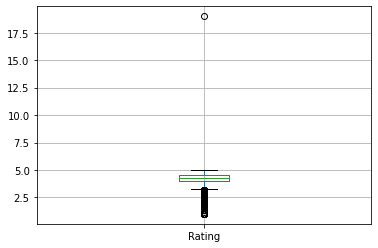

In [37]:
#lets check is there any outliner or not
df.boxplot()

**So, in our data there is outliner as well.Outliers are data points that are far from other data points. In other words, they're unusual values in a dataset.Since ratings cannot be more than 5 therefore there is outlier in our data**

In [38]:
#lets check information of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


So,these are the different data types whcich are present in our data.Since Reviews contains numerical values so it should be in float,similiarly Size,installs,price should also be float data type and last update should be datetime datatype.We will correct it in second step.

In [39]:
#lets check is there any missing value or not in our Data
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

So,there are null values in our data.
Rating has 1474 null values,type has 1 null value,current ver has 8 and Android Ver has 3 null values.

#Step 2. Cleaning the Data

Since we have taken an overwiew of our data.Now lets clean it. 

**1. Cleaning outliers**

In [42]:
#lets check how many outliners are there
df[df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


So,there is only one outlier that is on row no.10472.So we have to drop it.

In [43]:
#lets drop outliner
df.drop([10472],inplace=True)

In [44]:
#lets check whether row no.10472 is in our data or dropped
10472 in df


False

Great guys,I have removed outlier successfully.lets see it graphically as


---



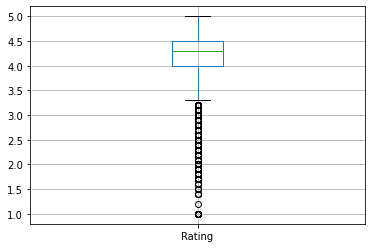

In [45]:
df.boxplot()

**2. Converting data into proper data structures.**

In [46]:
#since reviews are showing as object datatype in info so we need to convert it into inter datatype.
df['Reviews']=df['Reviews'].apply(lambda x:x.replace("3.0M","3000000"))
df['Reviews']=df['Reviews'].apply(lambda x: int(x))

In [47]:
#convert price into float datatype
df['Price']=df['Price'].apply(lambda x: x.replace("$","") if "$" in str(x) else x)
df['Price']=df['Price'].apply(lambda x:float(x))

In [48]:
#convert size into proper datatype
df['Size']=df['Size'].apply(lambda x : str(x).replace("Varies with device","NaN") if "Varies with device" in str(x) else x)
df['Size']=df['Size'].apply(lambda x:  str(x).replace("M","") if "M" in str(x) else x)
df['Size']=df['Size'].apply(lambda x:  float(str(x).replace("k",""))/1000 if "k" in str(x) else x)
df['Size']=df['Size'].apply(lambda x:  float(x))

In [49]:
#convert Installs into proper datatype
df['Installs']=df['Installs'].apply(lambda x : x.replace("+","")if "+" in str(x) else x)
df['Installs']=df['Installs'].apply(lambda x: x.replace(",","") if "," in str(x) else x)
df['Installs']=df['Installs'].apply(lambda x: int(x))

In [55]:
#convert last updated into datetime datatype
df['Last Updated'].unique()
df['Last Updated']=pd.to_datetime(df['Last Updated'])

In [58]:
#unique category
len(df['Category'].unique())

33

So,great has happened that we have converted our data into proper datatype

**3. Removing null values**

Since our data has null values as well,lets remove it


In [60]:
#lets removw null values
df.interpolate(method='linear',limit_direction='forward',inplace=True)

In [61]:
#lets check null values again
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

There are still null values in Type,Current Ver and Android Ver.Since Current Ver and Android Ver are not of much relevent for our data,lets drop it and Convert Type into proper datatype

In [63]:
#drop Current Ver and Android Ver 
df=df.drop(['Current Ver','Android Ver'],axis=1)

In [65]:
#lets convert Type into proper datatype
df['Type'].fillna(value='Free',inplace=True)

In [66]:
#now lets check info again for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          10840 non-null  float64       
 3   Reviews         10840 non-null  int64         
 4   Size            10840 non-null  float64       
 5   Installs        10840 non-null  int64         
 6   Type            10840 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 1016.2+ KB


Great guys,data is converted into proper datatype and there is no null values.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdb5795aed0>,
      dtype=object)

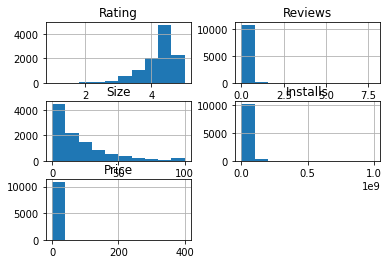

In [67]:
#lets see how our data looks after cleaning data
df.hist()